![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGfzLYUnbeiJsjovxRt-g6913Xm0VUFEByxjByYp2WymmROD5D)

This codelab will introduce you to opencv, an open source computer vision library written in C++ with bindings for Python. If we were using C++ we'd have to learn Opencv's custom matrix library, but lucky for us opencv directly uses numpy arrays in Python!

## Important!
You may have to `pip install opencv-python` before getting started on this codelab. Remeber to execute this *after* executing `source env/bin/activate` on mac/linux or `source/scripts/activate` on windows

## Loading Images

In [1]:
import cv2 # this loads opencv
import numpy as np
from matplotlib import pyplot as plt # this library will help us display results in jupyter

img = cv2.imread("jimmy.jpg")
height, width, channels = img.shape
print("img has a width of {} pixels, a height of {} pixels, and {} channels".format(width, height, channels))

plt.figure(figsize=(10,10)) # set the display size
plt.imshow(img) # display the image

img has a width of 400 pixels, a height of 400 pixels, and 3 channels


Here is the type of img: <class 'numpy.ndarray'>
Here is the top left pixel in the image: [34 32 52]
Here is the value of the center channel of the center pixel: 39


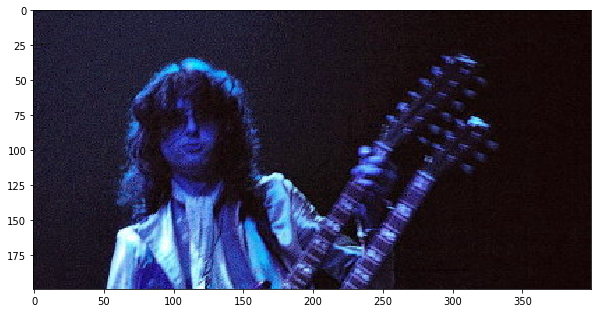

In [2]:
# img isn't some obscure opencv type, its just a numpy array 
print("Here is the type of img: {}".format(type(img)))

# since its just a numpy array, it can be accessed like such
pixel = img[0,0]
print("Here is the top left pixel in the image: {}".format(pixel))

pixel = img[99,99,1]
print("Here is the value of the center channel of the center pixel: {}".format(pixel))

# here is the bottom half of the picture cropped out
plt.figure(figsize=(10,10))
plt.imshow(img[:200,:])

## Weird formatting
You may be wondering why Jimmy looks so blue. If you navigate to `jimmy.png` with your file manager and open a preview, you will see that this blue tint doesn't show up in the actual image! This is because opencv loads images in BGR format ¯\_(ツ)_/¯, meaning that channel 0 of img is blue, channel 1 is green, and channel 2 is red. However matplotlib (seperate from opencv) expects images in the standard RGB format, so we have to permute the channels to display the correct image

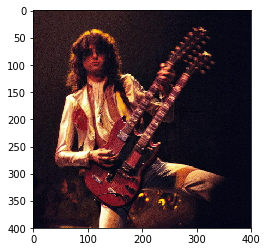

In [3]:
# we can use pure numpy to permute the dimensions
img_rgb = np.zeros_like(img) # BGR -> RGB
img_rgb[:,:,0] = img[:,:,2]
img_rgb[:,:,1] = img[:,:,1]
img_rgb[:,:,2] = img[:,:,0]

plt.imshow(img_rgb)

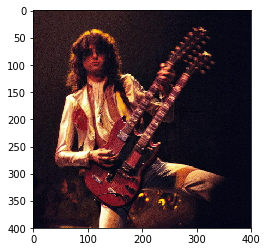

In [4]:
# here is a shorter way using more advanced numpy indexing
img_rgb = img[:,:,(2,1,0)]

plt.imshow(img_rgb)

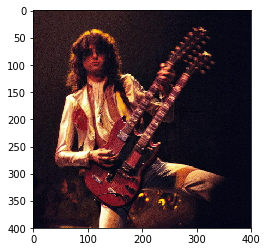

In [5]:
# the best way though is probably to use the built in opencv function
img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

## TODO

In [6]:
# crop img to just Jimmy's head and use plt to display it below. Remember to permute the channels!

In [7]:
# make Jimmy even more vintage by converting him to black and white!
# do this by averaging all 3 channels of the color image to produce a new image with a shape (400, 400).
# don't use opencv (yet)


# use the line below to display your grayscale image
# plt.imshow(img_gray, cmap='gray')

# Basic Functions

Opencv has alot of useful functions. Here are some of the most commonly used

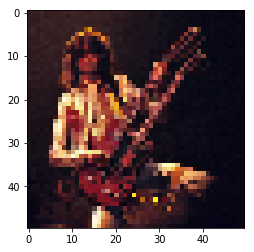

In [8]:
# you can resize an image
img_small = cv2.resize(img, (50, 50))

plt.imshow(img_small[:,:,(2,1,0)])

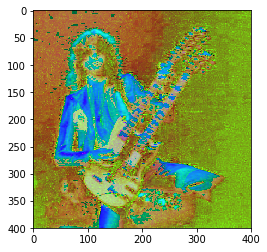

In [9]:
# you've already seen cvtColor, but it can do alot more depending on the flag you pass it
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# this is going to look weird since its interpreting HSV values as RGB
plt.imshow(img_hsv)

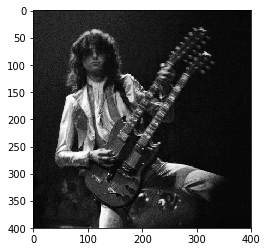

In [10]:
# you can also use cvtColor to convert images to grayscale
img_bgr2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# this is going to look weird since its interpreting HSV values as RGB
plt.imshow(img_bgr2gray, cmap='gray')

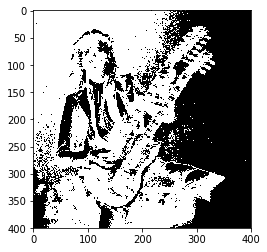

In [11]:
# thresholding, only selecting parts of an image whose pixel values fall between a certain range
# is often an important part of pre-processing

mask = cv2.inRange(img, (0,0,20), (200, 200, 200))

# this produces a binary mask, 0's were pixel don't fall in the specified range and 1's elsewhere
# 1's are displayed as white and 0's as black
plt.imshow(mask, cmap='gray')

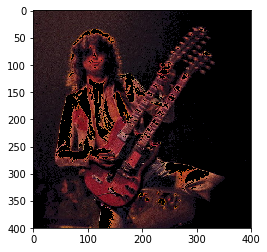

In [12]:
# you can apply the mask to the original image like such
img_masked = cv2.bitwise_and(img, img, mask = mask)

plt.imshow(img_masked[:,:,(2,1,0)])

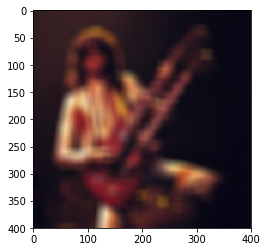

In [13]:
# There are many different ways to blur an image.
# blurring helps remove noise and irrelevant details from the image. 
# If you've ever tried to take a picture with your
# phone in a dark room and noticed a grainy pattern, particularly on dark sections of the image,
# that is what I mean by noise

# This applies a "box filter" to the image, which is the same as convolving with a kernel of all 1's
# (20, 20) is the size of the kernel. The bigger the box filter, the more blurred the image
img_blur = cv2.blur(img,(20,20))

# this image is blurred much more than what you'd typically see
plt.imshow(img_blur[:,:,(2,1,0)])

Gaussian blur is another, more commonly used smoothing filter. Here is an example of a gaussian kernel:

![](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gausmask.gif)

and here is a 3d visualization of a guassian:

![](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss2.gif)

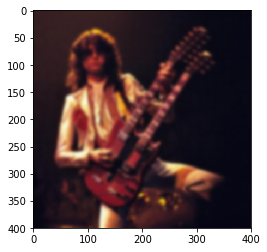

In [14]:
# gaussian blur is good at removing gaussian noise from an image
img_gaus = cv2.GaussianBlur(img, (15,15), 0)

# this image is blurred much more than what you'd typically see
plt.imshow(img_gaus[:,:,(2,1,0)])

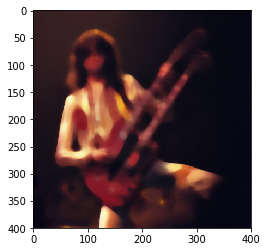

In [15]:
# and yet another type blur is the median blur, which takes the median pixel in each image patch
img_med = cv2.medianBlur(img, 15)

plt.imshow(img_med[:,:,(2,1,0)])

## TODO

In [16]:
# Apply a median blur to Jimmy and then use thresholding to try and isolate as much of just the guitar
# as you can. Hint: thresholding can sometimes be easier in different color spaces, just remember to convert 
# whatever you have to RGB before using plt to display it!

# Image Gradients

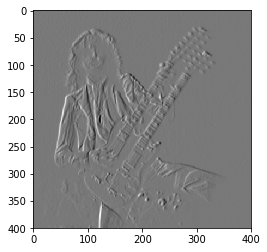

In [17]:
# opencv's gradient functions take a single channel image, 
# so we'll have to convert to grayscale
img_bgr2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# sobel is a popular derivative operator.
# the second parameter is a flag specifying the output image should contain 64 bit floating point numbers
# the third and fourth parameters specify the x-direction
# and the last paremeter specifies a 5x5 kernel
sobelx = cv2.Sobel(img_bgr2gray, cv2.CV_64F,1,0, ksize=5)

plt.imshow(sobelx, cmap='gray')

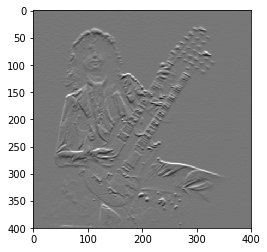

In [18]:
# and compute the y direction
sobely = cv2.Sobel(img_bgr2gray,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobely, cmap='gray')

## TODO

In [19]:
# Write a function that takes the x derivative of the image by applying the kernel [1, 0, -1].
# You may use any numpy function, but no opencv functions.
# Handle edge effects in whatever way is easiest for your implimentation

## Canny Edges

Canny edges is the defacto standard edge detection algorithm. It uses image gradients and a couple fancy thresholding algorithms called non-maximum suppression and hysteresis. We will go more into these in a later class but basically they ensure that edges are only one pixel wide.

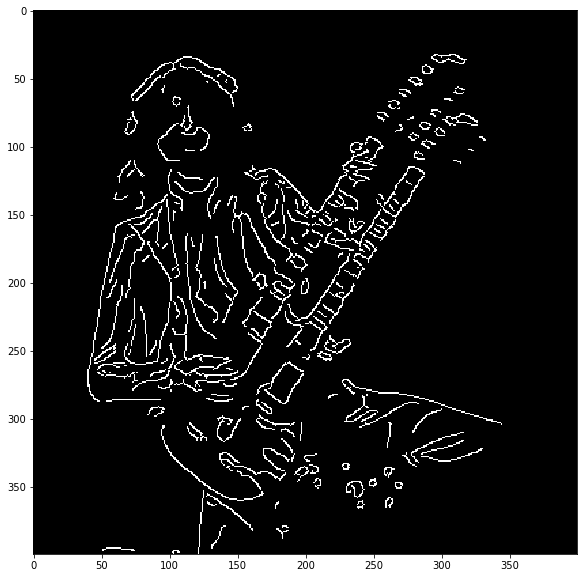

In [20]:
# opencv's canny function can only take a single channel image, 
# so we'll have to convert to grayscale
img_canny = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# it is also common to apply a gaussian blur before applying canny edges
# to remove irrelavant texture from the image
img_canny = cv2.GaussianBlur(img, (7,7), 0)

# the 2nd and 3rd parameters are thresholds for the hysteresis procedure
edges = cv2.Canny(img_canny,150,200)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')

## Template Matching

This simple but powerful technique can be used to search a large image with a smaller one. It works by sliding the template across the larger image and computing the sum difference of each pixel, the idea being that the computed value will be small when you have found a good match.

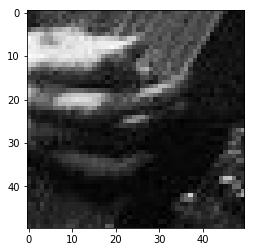

In [21]:
# opencv's gradient functions take a single channel image, 
# so we'll have to convert to grayscale
img_bgr2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = img_bgr2gray[250:300,120:170]

# Jimmy's magic hand
plt.imshow(template, cmap='gray')

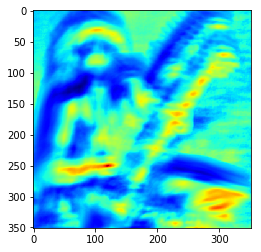

In [22]:
# apply the template like a filter
res = cv2.matchTemplate(img_bgr2gray, template, cv2.TM_CCOEFF_NORMED)

# dark red indicates a good match while blue indicated a poor one
plt.imshow(res, cmap='jet')

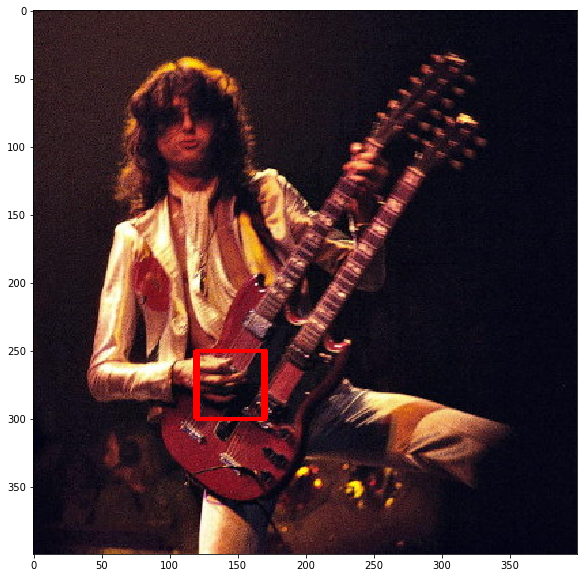

In [23]:
# draw a boxes around the best matches
img_draw = np.copy(img)

threshold = 0.9
h, w = template.shape

# returns a list of all the coordinates whose values are greater than the threshold
loc = np.argwhere(res >= threshold)

# draw rectangles on the image
for (y, x) in loc:
    cv2.rectangle(img_draw, (x, y), (x + w, y + h), (0,0,255), 2)

plt.figure(figsize=(10,10))
plt.imshow(img_draw[:,:,(2,1,0)])

## Challenge Question: Where Is Waldo?

You don't have to do this but I encourage you to try!

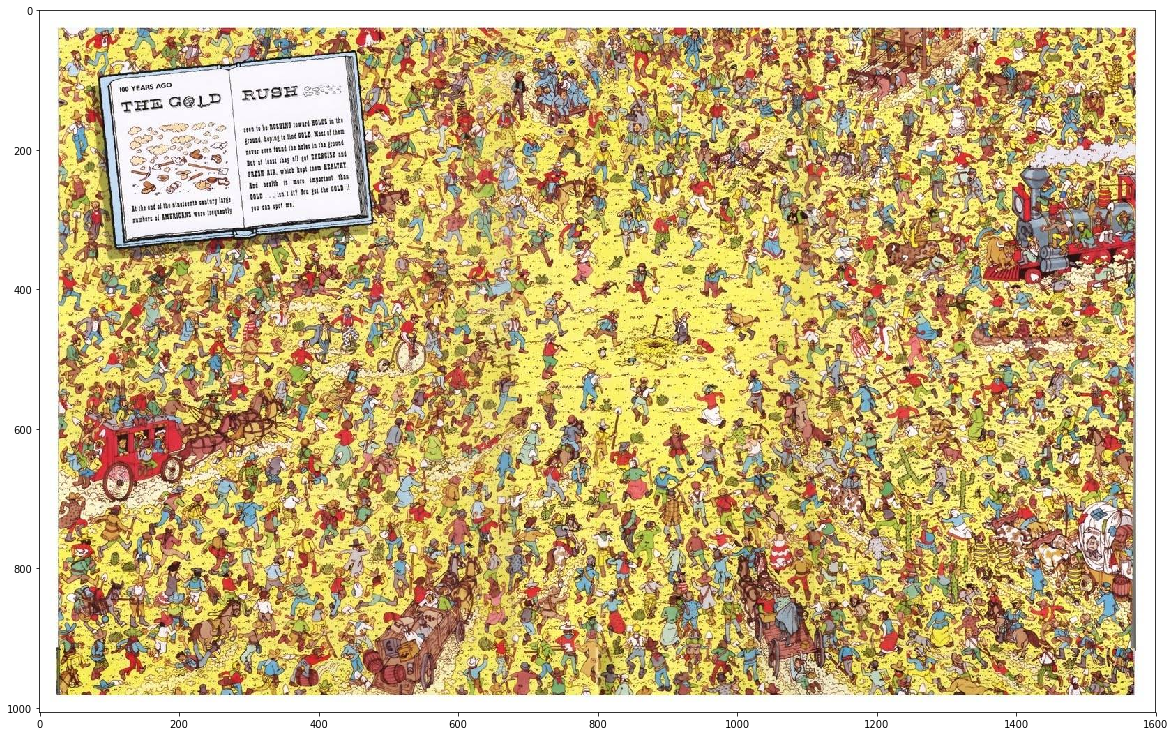

In [24]:
# Use template matching and/or any other technique discussed in this codelab to locate waldo in this picture.
# I haven't provided you with a template, but feel free to find one online or make a pattern that you think
# would match waldo

where_is_waldo = cv2.imread("whereiswaldo.jpg")

plt.figure(figsize=(20,20))
plt.imshow(where_is_waldo[:,:,(2,1,0)])